# 以 jieba 與 gensim 探索文本主題

Note: 原文出自[Youngmi huang在Medium](https://medium.com/pyladies-taiwan/%E4%BB%A5-jieba-%E8%88%87-gensim-%E6%8E%A2%E7%B4%A2%E6%96%87%E6%9C%AC%E4%B8%BB%E9%A1%8C-%E4%BA%94%E6%9C%88%E5%A4%A9%E4%BA%BA%E7%94%9F%E7%84%A1%E9%99%90%E5%85%AC%E5%8F%B8%E6%AD%8C%E8%A9%9E%E5%88%86%E6%9E%90-i-cd2147b89083)的文章

## 五月天人生無限公司歌詞分析 ( I )

構成語句最基本為字詞，使用 word2vec 將字詞轉為詞向量後，為了從文本數據得到顯著而有用的資訊，需要的是探索支援自然語言處理的工具與嘗試，例如基於 python 的主題模型函式庫 gensim ，是 python 做自然語言處理必備的工具之一。

本次主題著重於實現心目中想做的數據集的運用，會拆成上下篇，上篇主要為 jieba 的中文斷詞與特徵萃取；下篇則會聚焦於 gensim 主題建模的使用。

## 源起

五月天在 2017 年底的「人生無限公司演唱會」，在 10 月開搶後秒殺，短短15 分鐘完售 24 萬張門票，為什麼大家這麼喜歡搶五月天的門票？曾經有人說：每個人心目中都有一首五月天，我將它解讀為，每個人腦海中「第一首浮現的五月天」，那一首歌，陪伴人們成長過程的青春、夢想與回憶等。

本次僅以「歌詞」作為相近歌單之間的主題探索，歌詞為文本，是屬於自然語言處理領域，若要做到更精細，可以結合文本+語音的方式去找尋歌曲相似度，此任務就會較為複雜。

![五月天人生無限公司](https://i1.wp.com/www.iwaishin.com/wp-content/uploads/2017/12/img_1634.jpg?resize=696%2C478&ssl=1)

## 為什麼要做這件事? 怎麼應用?

出於好奇「人生無限公司演唱會」歌單裡的歌詞有哪些關鍵字詞，掌握這些字詞之後，在和五月天以及全場聽眾一起唱歌的時候，就可以避免不會唱的窘境( e.g. 派對動物的關鍵字詞: oh oh oh oh) 。

另外，演唱會進行中，我們並不知道會有什麼驚喜，也許唱了一首冷門歌曲而你很喜歡，記下歌名之後，就可以透過主題建模找尋相近歌詞的方式，找到另一首你可能也很喜歡的歌曲。

## 歌詞數據集

蒐集了在 2017/9 ~ 2017/10 之間，五月天人生無限公司巡迴演唱會的歌單(於深圳、洛陽、南京、福州這 4 場)，共 33 首歌詞 (取自：[Moji 魔鏡歌詞網](https://mojim.com/))。

數據集選取是保有彈性的，每個人可自由選擇喜歡的歌詞做資料蒐集 ( e.g. 蘇打綠、周杰倫、玖壹壹)。但在資料前處理的時候會需要一點時間(包含: 資料格式、特殊字元、統一英文大小寫、以及歌詞雜訊等)，這次花了不少時間在這塊以及嘗試讀取資料(這又是另一段故事了)，建議將資料整理成下列格式：

![test](https://cdn-images-1.medium.com/max/800/1*SY-TRGJ-ZjUa8WoksESJMQ.png)

同一首歌詞之間是空白、不同首歌詞之間是換行、存成文字檔 (預設編碼是 utf-8 )

## 任務說明

因 python3 對於中文支持與編碼更友善，本篇以 python3 進行。所需安裝套件：[jieba](https://github.com/fxsjy/jieba)、[gensim](https://radimrehurek.com/gensim/tutorial.html)、[wordcloud](https://github.com/amueller/word_cloud) (文字雲)。

* 歌詞分析：較為初級的任務，利用 `jieba.analyse`取出文章中的關鍵詞，透過文字雲做視覺化呈現 。
* 主題建模：引用 `gensim` 當中 `corpora` 、 `models`、 `similarities` 模組，分別做語料庫建立、主題模型、與相似度比較。

## 專案的檔案路徑佈局

1. 安裝Anaconda
2. 產生一個Anaconda環境
3. 安裝函式庫
```
pip install jieba
pip install gensim
pip install wordcloud
```
4. 下載 [youngmihuang/lyrics_application](https://github.com/youngmihuang/lyrics_application) 的Github專案
```
git clone https://github.com/youngmihuang/lyrics_application.git
```

5. 以"Download ZIP"的方式下載 [fxsjy/jieba](https://github.com/fxsjy/jieba), 解壓縮後將"extra_dict"整個目錄複製到"lyrics_application/model"目錄下

6. 下載[Google 中文字型-Noto Sans CJK TC](https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip), 解壓縮後將"NotoSansCJKtc-Black.otf"字型檔複製到"lyrics_application/fonts"目錄下

7. 最後你的目錄結構看起來像這樣: (這裡只列出來在這個範例會用到的相關檔案與目錄)

```
lyrics_application/
├──xxxx.ipynb (代表這個範例的notebook)
├── fonts/
│   └── NotoSansCJKtc-Black.otf
├── model/
│   └── extra_dict
│       ├── dict.txt.big
│       ├── dict.txt.small
│       ├── idf.txt.big
│       └── stop_words.txt
└── dataset/
    ├── lyrics_cut_mayday.dataset
    ├── lyrics_word_net_mayday.dataset
    ├── mayday.txt
    ├── single_song.txt	
    └── test1.txt
```

### 載入相關函式庫

In [1]:
# 把一些警告的訊息暫時関掉
import warnings
warnings.filterwarnings('ignore')

# Utilities相關函式庫
import os
import numpy as np
import codecs

# 使用"結巴(jieba)來進行分析
import jieba.analyse

# 圖像處理/展現的相關函式庫
import matplotlib.pyplot as plt
from wordcloud import WordCloud

### 設定相關設定與參數

In [2]:
# 專案的根目錄路徑
ROOT_DIR = os.getcwd()

# 訓練/驗證用的資料目錄
DATASET_PATH = os.path.join(ROOT_DIR, "dataset")

# 模型資料目錄
MODEL_PATH = os.path.join(ROOT_DIR, "model")
JIEBA_DICTFILE_PATH = os.path.join(MODEL_PATH,"extra_dict", "dict.txt.big")

# 中文字型目錄
FONT_PATH = os.path.join(ROOT_DIR, "fonts")
FONT_FILE_PATH = os.path.join(FONT_PATH, "NotoSansCJKtc-Black.otf")

## 歌詞分析

歌詞分析主要用到的是 `jieba.analyse.extract_tags`，背後的原理為 `tf-idf` 算法。

### 1. tf - idf 簡介 ( term frequency–inverse document frequency )

`tf-idf` 是一種統計方法，此原理為評估一個字詞對於一個檔案集，或一個語料庫中的其中一份檔案的重要程度，這個概念十分重要。
* tf (term frequency )：詞頻，計算該詞語在文章所出現的次數
* idf ( inverse document frequency )：逆文檔頻率，衡量該字詞的重要性

![tf-idf](https://cdn-images-1.medium.com/max/800/1*n1ReZe2OGaEBYg3kvzYhkQ.png)

字詞的重要性隨著它在檔案中出現的次數成正比增加，但同時會隨著它在語料庫中出現的頻率成反比下降。也就是說，當 tf 值很高，而 df 值很低，這時得到的權重值就能夠把常見的關鍵字濾掉。詳細數學原理可參考[維基百科](https://zh.wikipedia.org/wiki/Tf-idf)。

以五月天「乾杯」這首歌詞簡單舉例：

![乾杯](https://cdn-images-1.medium.com/max/800/1*8W7A8cop8s_AA5NfqSh2Og.png)



In [3]:
# 設定繁體中文字典
jieba.set_dictionary(JIEBA_DICTFILE_PATH)

# 將"乾杯"這首歌的關鍵字詞取出來 
# topK代表要取的前幾大的關鍵字 

song_lyrics = os.path.join(DATASET_PATH, "single_song.txt")

with open(song_lyrics, "rb") as f:
    for line in f:
        tags = jieba.analyse.extract_tags(line,topK=10, withWeight=True)
        for tag, weight in tags:
            print(tag + "," + str(int(weight * 10000)))

Building prefix dict from D:\ml\w2v_collection\lyrics_application\model\extra_dict\dict.txt.big ...
Loading model from cache C:\Users\pc\AppData\Local\Temp\jieba.uf510b40f8caa564909e705b4629077b5.cache
Loading model cost 2.709 seconds.
Prefix dict has been built succesfully.


不會,3290
歲月,2741
時間,2741
回憶,2741
一天,2715
終點,2193
懷念,2193
也許,2193
舉起,2193
悠悠的,2169


### 2. 從歌詞萃取重要關鍵字

接下來將演唱會歌單出現的 33 首歌詞同樣以 `jieba.analyse.extract_tags`取出歌曲的 10 大關鍵字，透過萃取出來的資訊，其實不難猜出下面這 5 首歌的歌名(你的腦海裡應該開始出現著這首歌的旋律了)。

In [4]:
# 把每首歌的tags取出
all_songs_lyrics = os.path.join(DATASET_PATH, "test1.txt")

with open(all_songs_lyrics, "rb") as f:
    for line in f:
        tags = jieba.analyse.extract_tags(line,10)
        print(",".join(tags))

不會,歲月,時間,回憶,一天,終點,懷念,也許,舉起,悠悠的

我們,從不,那個,相識,出現,場景,哪裡,不曾,相遇,每秒

我們,好好,變老,不過,一隻,沒有,喧囂,時間,最後,知道

後來,我們,人生,無論是,淚水,一個,期待,中能,然後,快樂

入陣曲,滾燙,無悔,夜未央,倖存,天未亮,沙場,心未涼,淚未,什麼

最好,day,一天,best,閉上眼,銀河,好了沒,瞬間,那天,地球

OAOA,一個,短暫,人生,永遠,一種,現在,無止盡,搖滾樂,轉眼

la,will,孤單,high,High,fine,everything,Tomorrow,alright,陪伴

oh,party,hey,派對,go,動物,night,我們,let,lonely

什麼,能夠,拯救,愛情,結局,殘酷,束手無策,攻擊,那麼,地球

決定,快樂,保護色,永遠,靈魂,軀殼,不愛了,鎖上,真正,不恨

一個,兄弟,這樣,我們,怎樣,一次,身旁,人生,抬頭,變成

過嗎,人生,沒有,部門,請假,目標,無限,富貴榮華,飛黃騰達,有限

盡頭,怎麼樣,我們,終點,可有光,成名,那夜,一雙,那路,風光

變成,交響,每個,孤單,崩壞,還有,一個,沒人,人唱,我心

記得,卡片,西天,夥伴,掏耳朵,累不累,光榮,還在,回來,取經

怎麼,擁有,快樂,盡頭,一陣風,感動,足夠,最痛,吹來,發現

我們,無數,人們,未來,相異,羅盤,現在,命運,如海,怎樣

yeah,出現,有沒有,呼喚,越來越,情節,一種,電影,黎明,我們

頑固,一次,深處,活在,拼回,淚滴,一天,吞下,相信,自己

do,ever,shine,die,現在,try,出來,jalalala,jalalan,時代

夢寐以求,人們,改變,何時,看見,擁有,容顏,問你,春天,就算

煩惱,噗通,甩掉,跳越,丟掉,地球,一顆,一瞬間,忘掉,再也

love,ing,戀愛,改變,黃昏,噴射機,happy,黎明,心情,心跳

我們,任意,那個,走過,唱片,無盡,歲月,光輝,搭著,遺忘

有沒有,回憶,原來,飛翔,自傳,遺忘,愛情,最愛,最終,身旁

決定,什麼,傷心,之後,就讓,快樂,潮落,潮起,拋棄,整個

動次,快樂,oh,不管,慢歌,反正,音樂,趴著,活著,傷心

一層,洋蔥,空氣,永遠,願意,剝開,聽到,沉默,偷偷,如果

溫

上述是看個別歌曲的關鍵字；接著我們來看這次五月天在「人生無限公司巡迴演唱會」所唱的歌單裡的含有哪些元素：

In [5]:
# 演唱會歌單出現的 33 首歌詞
all_songs_lyrics = os.path.join(DATASET_PATH, "test1.txt")

#每首歌的前10大tags的集合
all_songs_top10_tags = [] 

with open(all_songs_lyrics, "r", encoding='utf8') as f1:
    for line in f1:
        words = jieba.analyse.extract_tags(line,10) #取10個tags
        all_songs_top10_tags.extend(words) # 把tags存放起來
f1.close()

# 串接所有歌的前10大tags成一長字串
all_songs_top10_tags_text = " ".join(all_songs_top10_tags)

# 最後再找出所有歌的前15大的tags
top15_tags = jieba.analyse.extract_tags(all_songs_top10_tags_text,15) 
print(",".join(top15_tags))

我們,快樂,現在,一個,什麼,沒有,回憶,傷心,孤單,永遠,人生,oh,變成,決定,怎樣


### 3. 使用 wordcloud 呈現

`wordcloud` 這個套件是文字雲，預設是支援英文(因為是 amueller 這位作者開發的)，需另外下載中文字體，才能在文字雲當中顯現中文，若是英文歌詞則無需特別下載字體。可參考 [Google Noto Fonts](https://www.google.com/get/noto/) 開源字體下載，選擇支援中文的字型，比如[NotoSansCJK-TC](https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip)。

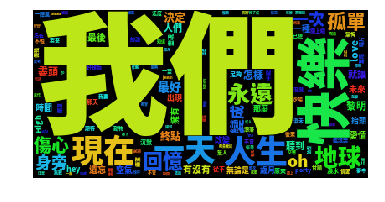

In [6]:
# 設定停用字(排除常用詞、無法代表特殊意義的字詞)
stopwords = {}.fromkeys(["沒有","一個","什麼","那個"])

# 產生文字雲
wc = WordCloud(font_path="fonts/NotoSansCJKtc-Black.otf", #設置字體
               background_color="black", #背景顏色
               max_words = 2000 ,        #文字雲顯示最大詞數
               stopwords=stopwords)      #停用字詞

wc.generate(all_songs_top10_tags_text)

# 視覺化呈現
plt.imshow(wc)
plt.axis("off")
plt.figure(figsize=(10,6), dpi = 100)
plt.show()

### 4. 小結

透過「從歌詞文本當中找出關鍵字 +文字雲視覺化」的關鍵字歌詞呈現，我們從五月天這 4 場「人生無限公司巡迴演唱會」共 33 首歌曲當中看到的結果：以「我們」、「人生」、「回憶」、「快樂」為主軸。

### 參考:
![Youngmi huang](https://cdn-images-1.medium.com/fit/c/60/60/0*VYaQ-JgWF7OsETaG.jpg)

* [Youngmi huang@以jieba與gensim探索文本主題：五月天人生無限公司歌詞分析(I)](https://medium.com/pyladies-taiwan/%E4%BB%A5-jieba-%E8%88%87-gensim-%E6%8E%A2%E7%B4%A2%E6%96%87%E6%9C%AC%E4%B8%BB%E9%A1%8C-%E4%BA%94%E6%9C%88%E5%A4%A9%E4%BA%BA%E7%94%9F%E7%84%A1%E9%99%90%E5%85%AC%E5%8F%B8%E6%AD%8C%E8%A9%9E%E5%88%86%E6%9E%90-i-cd2147b89083)